In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

### Load Dataset

In [2]:
df = pd.read_csv("../preprocessed.csv", na_filter=True, keep_default_na=False, na_values=[''])
backup = df.copy()

### Data Inspection

In [13]:
display(df.info())
display(df.head())
display(df.describe())
display(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10150 entries, 0 to 10149
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   diravg            10150 non-null  int64  
 1   humidrel          10150 non-null  float64
 2   ocurcause         10150 non-null  int64  
 3   ocurdo            10150 non-null  int64  
 4   rainamount        10150 non-null  float64
 5   raindays          10150 non-null  int64  
 6   tempavg           10150 non-null  float64
 7   windavg           10150 non-null  float64
 8   within_30km       10150 non-null  float64
 9   within_30km_fact  10150 non-null  int64  
 10  height            10150 non-null  float64
 11  scale_damage      10150 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 951.7 KB


None

,diravg,humidrel,ocurcause,ocurdo,rainamount,raindays,tempavg,windavg,within_30km,within_30km_fact,height,scale_damage
0,15,57.0,6,0,0.5,6,23.6,1.9,2.0,0,493.5,2.0
1,10,46.0,2,2,1.5,6,29.6,2.4,7.0,159,622.1,1.0
2,12,57.0,0,0,0.5,2,29.3,1.3,3.0,0,557.5,2.0
3,24,46.0,7,13,1.5,3,25.3,3.3,4.0,22,354.7,0.0
4,10,40.0,1,0,0.5,1,22.3,2.0,3.0,1,535.5,1.0


,diravg,humidrel,ocurcause,ocurdo,rainamount,raindays,tempavg,windavg,within_30km,within_30km_fact,height,scale_damage
count,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000,10150.00000,10150.000000,10150.000000,10150.000000,10150.000000
mean,16.367882,34.732936,5.839606,6.696453,5.816660,9.679704,13.638059,3.43934,8.299212,98.197340,368.784276,1.195172
std,7.010418,16.585802,1.946442,5.708246,8.967357,8.404259,7.961105,2.05719,9.795587,163.733317,270.467414,0.908156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.700000,0.00000,0.000000,0.000000,2.900000,0.000000
25%,11.000000,23.000000,6.000000,2.000000,1.000000,4.000000,8.200000,2.00000,3.000000,5.000000,163.900000,0.000000
50%,18.000000,33.000000,7.000000,5.000000,2.500000,7.000000,13.800000,3.20000,5.000000,34.000000,297.000000,2.000000
75%,21.000000,45.000000,7.000000,12.000000,6.700000,12.000000,19.200000,4.50000,10.000000,113.000000,500.500000,2.000000
max,30.000000,99.000000,8.000000,17.000000,97.500000,75.000000,38.000000,17.70000,50.000000,840.000000,1740.500000,2.000000


diravg              0
humidrel            0
ocurcause           0
ocurdo              0
rainamount          0
raindays            0
tempavg             0
windavg             0
within_30km         0
within_30km_fact    0
height              0
scale_damage        0
dtype: int64

<Figure size 360x360 with 0 Axes>

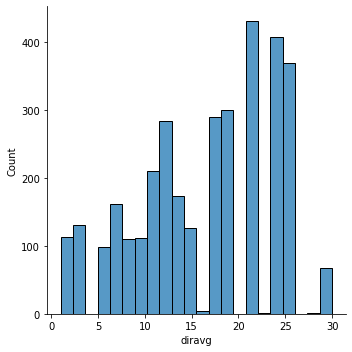

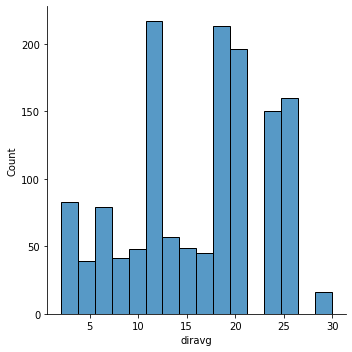

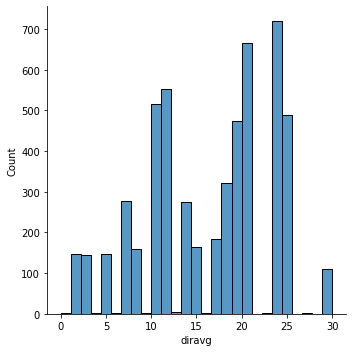

<Figure size 360x360 with 0 Axes>

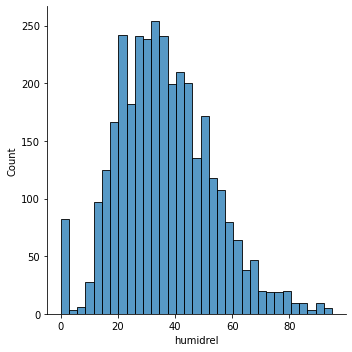

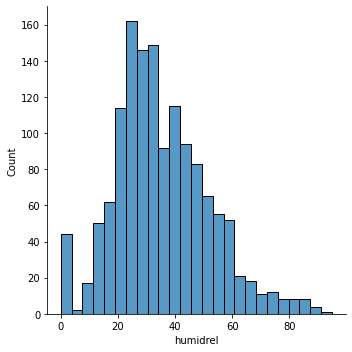

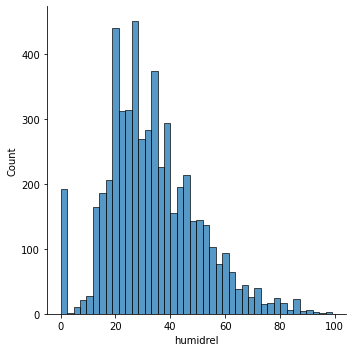

<Figure size 360x360 with 0 Axes>

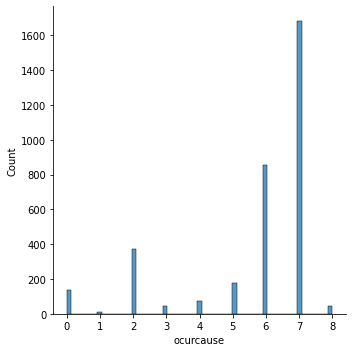

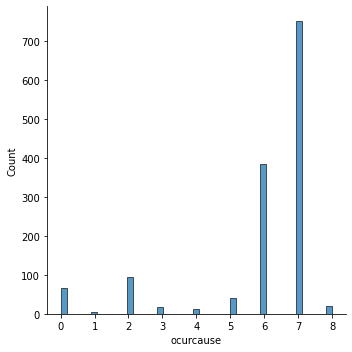

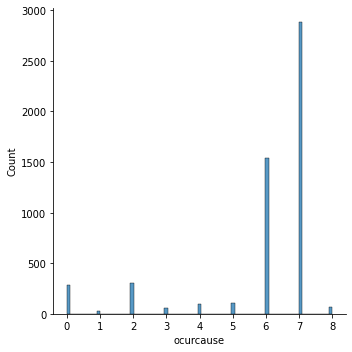

<Figure size 360x360 with 0 Axes>

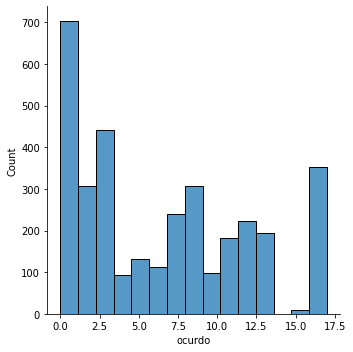

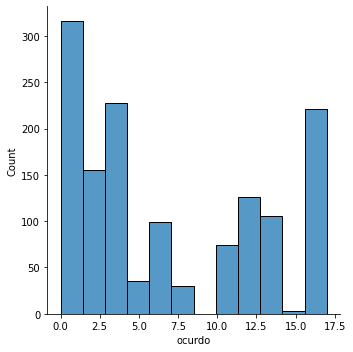

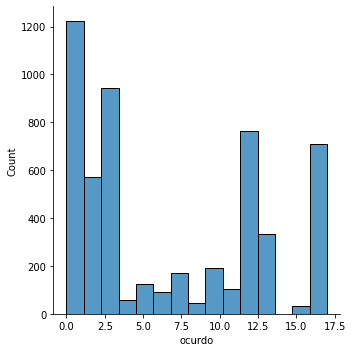

<Figure size 360x360 with 0 Axes>

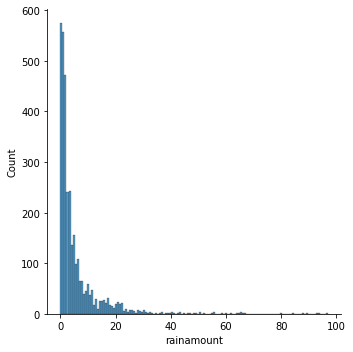

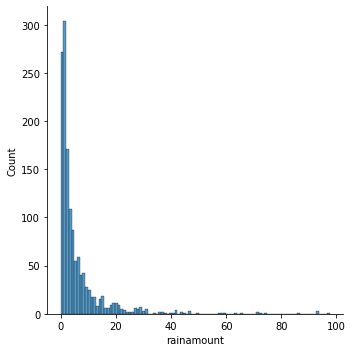

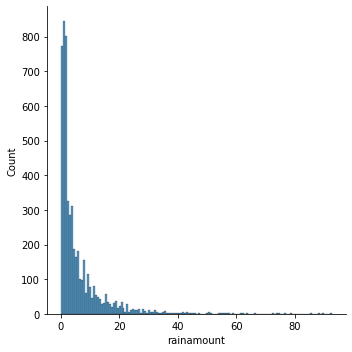

<Figure size 360x360 with 0 Axes>

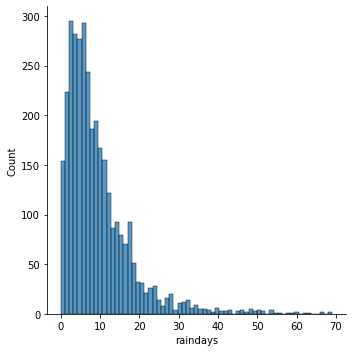

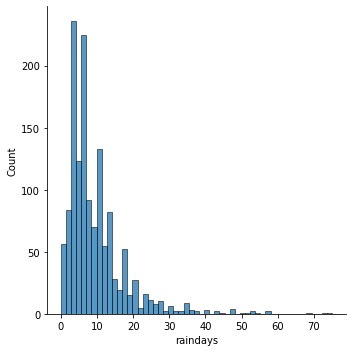

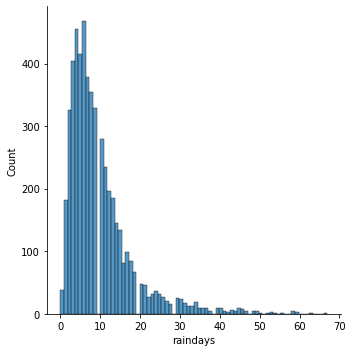

<Figure size 360x360 with 0 Axes>

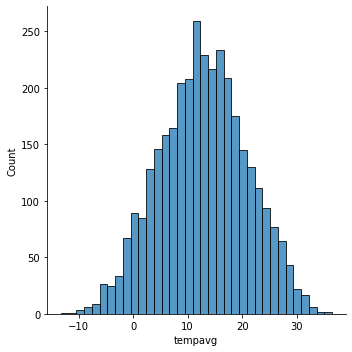

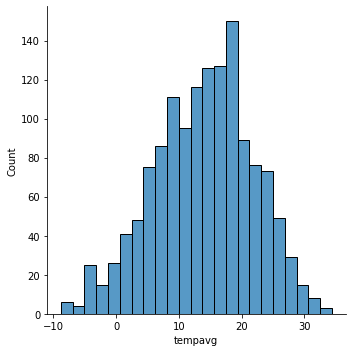

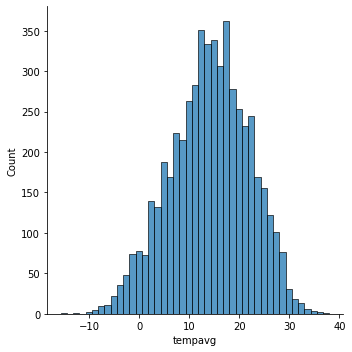

<Figure size 360x360 with 0 Axes>

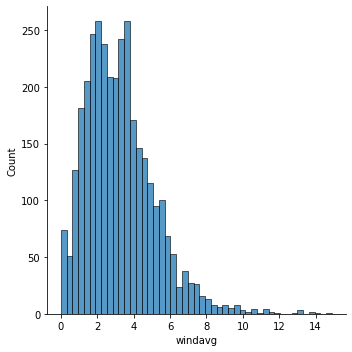

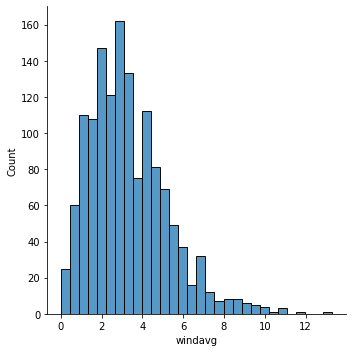

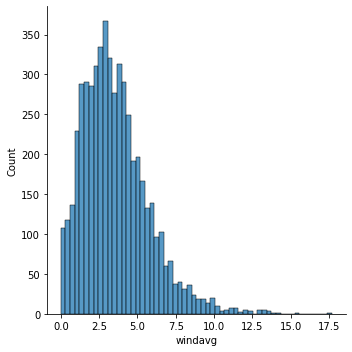

<Figure size 360x360 with 0 Axes>

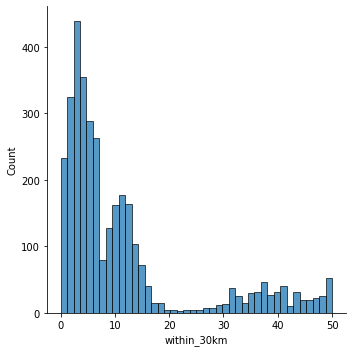

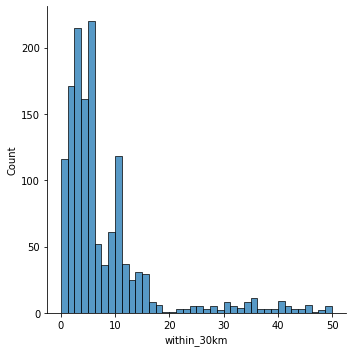

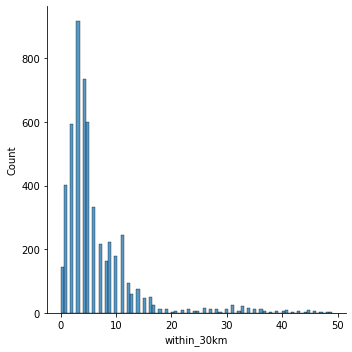

<Figure size 360x360 with 0 Axes>

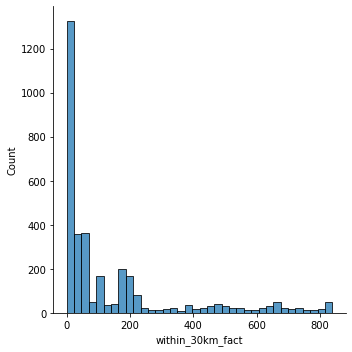

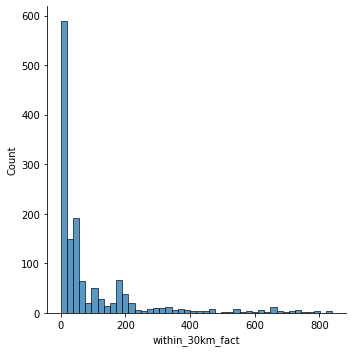

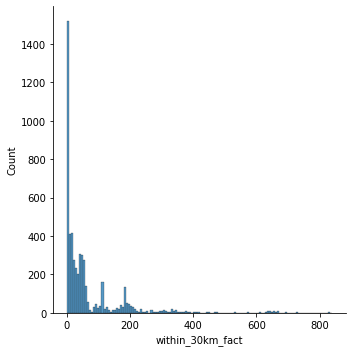

<Figure size 360x360 with 0 Axes>

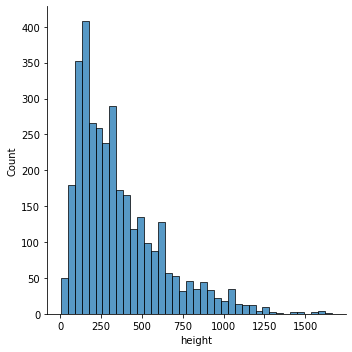

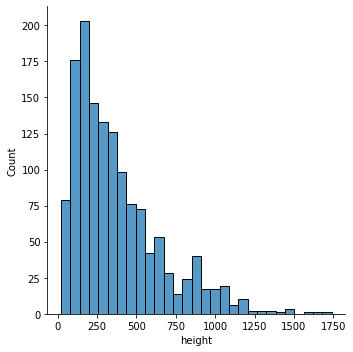

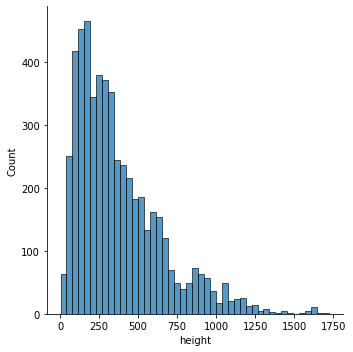

<Figure size 360x360 with 0 Axes>

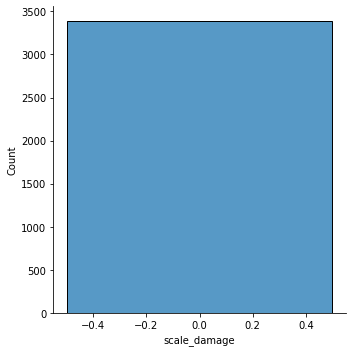

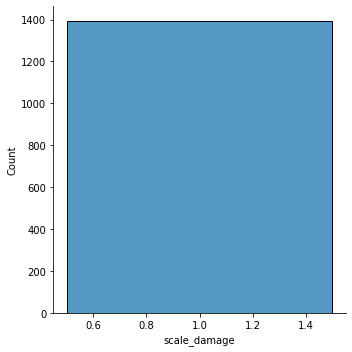

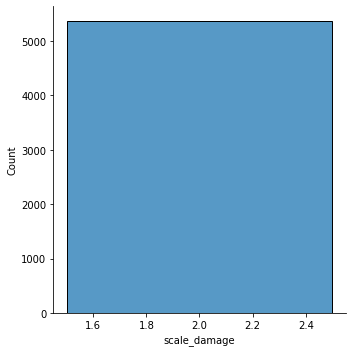

In [4]:

# columns distribution

for col in df.columns:
    try:
        plt.figure(figsize=(5, 5))
        sns.displot(df[backup['scale_damage'] == 0][col])
        sns.displot(df[backup['scale_damage'] == 1][col])
        sns.displot(df[backup['scale_damage'] == 2][col])
        plt.show()
    except:
        plt.clf()

<Figure size 360x360 with 0 Axes>

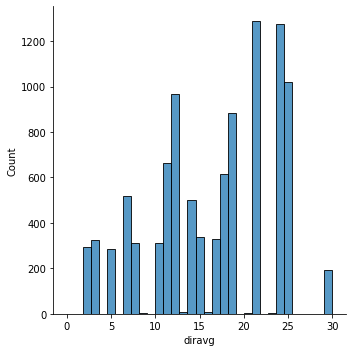

<Figure size 360x360 with 0 Axes>

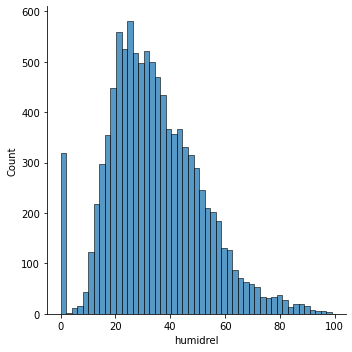

<Figure size 360x360 with 0 Axes>

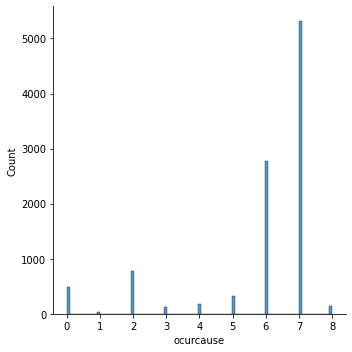

<Figure size 360x360 with 0 Axes>

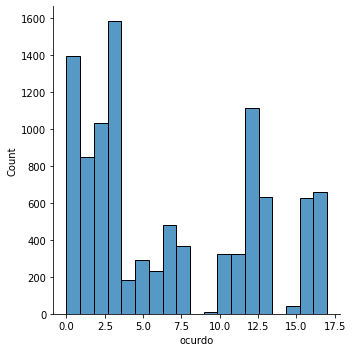

<Figure size 360x360 with 0 Axes>

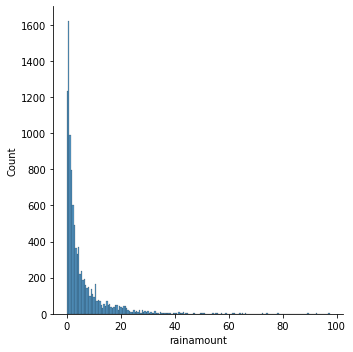

<Figure size 360x360 with 0 Axes>

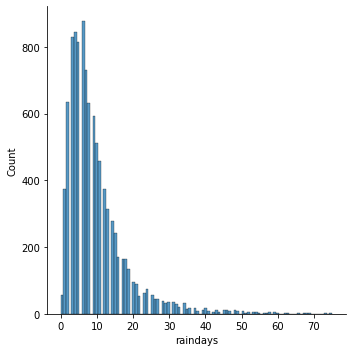

<Figure size 360x360 with 0 Axes>

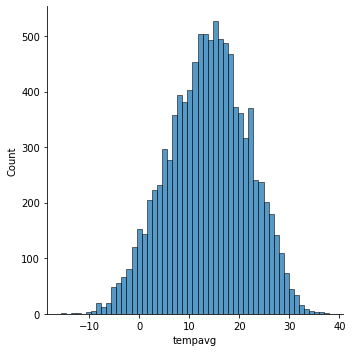

<Figure size 360x360 with 0 Axes>

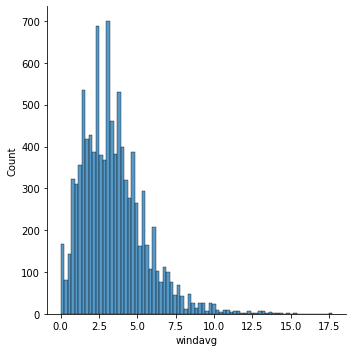

<Figure size 360x360 with 0 Axes>

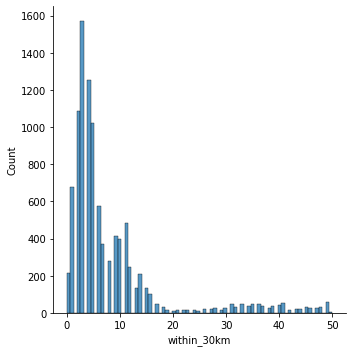

<Figure size 360x360 with 0 Axes>

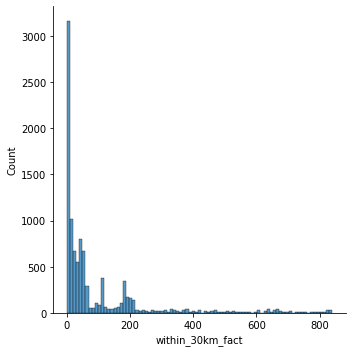

<Figure size 360x360 with 0 Axes>

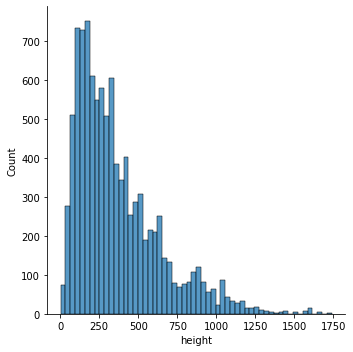

<Figure size 360x360 with 0 Axes>

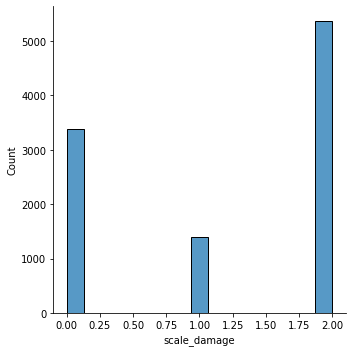

In [5]:
for col in df.columns:
    try:
        plt.figure(figsize=(5, 5))
        sns.displot(df[col])
        plt.show()
    except:
        plt.clf()

### Ocurcause Column, Check Unique

In [6]:
# print unique values count in 'ocurcause'
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 500)
pd.set_option('display.expand_frame_repr', True)
print(df['ocurcause'].value_counts())

7    5316
6    2780
2     769
0     484
5     320
4     182
8     139
3     121
1      39
Name: ocurcause, dtype: int64


### Correlation

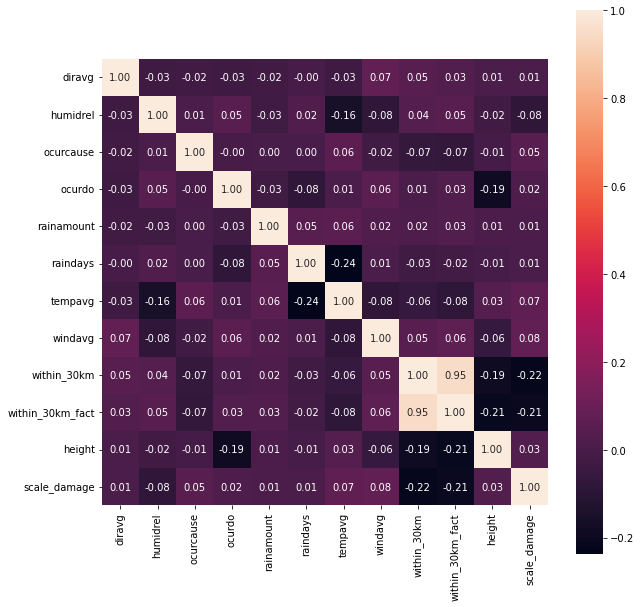

In [7]:
df = pd.read_csv("../preprocessed.csv", na_filter=True, keep_default_na=False, na_values=[''])
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True)
plt.show()

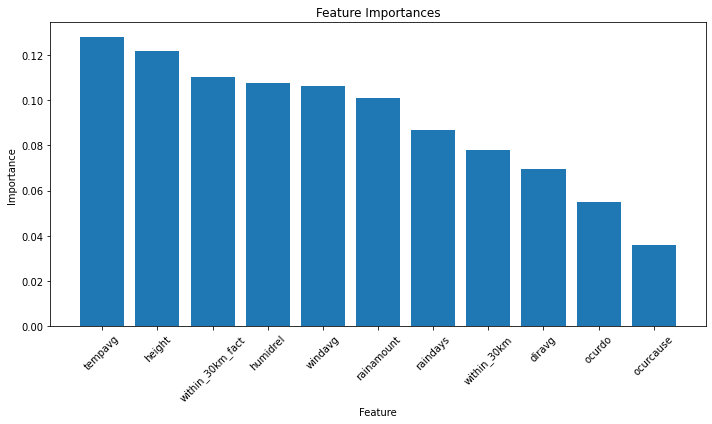

             Feature  Importance
6            tempavg    0.127984
10            height    0.121658
9   within_30km_fact    0.110411
1           humidrel    0.107524
7            windavg    0.106422
4         rainamount    0.100936
5           raindays    0.086623
8        within_30km    0.078081
0             diravg    0.069612
3             ocurdo    0.055046
2          ocurcause    0.035704


In [8]:
df = pd.read_csv("../preprocessed.csv", na_filter=True, keep_default_na=False, na_values=[''])
# Separate the features (X) and the target variable (y)
X = df.drop('scale_damage', axis=1)  # Exclude the target variable
y = df['scale_damage']  # Target variable

# Create a Random Forest regressor model and fit the data
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame with feature names and importance scores
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

# Print the feature importance in descending order
print(importance_df.sort_values(by='Importance', ascending=False))

[0.08762957 0.09854403 0.05846022 0.0630977  0.09590413 0.09685278
 0.10289194 0.10046157 0.09575668 0.10333886 0.09706252]


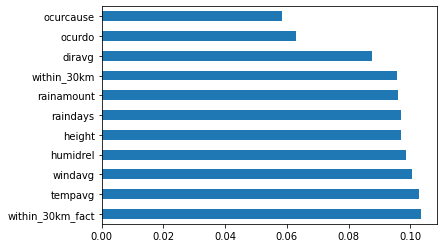

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

data = pd.read_csv("../preprocessed.csv", encoding='utf-8')
X = data.drop('scale_damage', axis=1)
y = data['scale_damage'] #target column, i.e., price range

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(50).plot(kind='barh')

plt.show()

In [10]:
data = pd.read_csv("../preprocessed.csv", encoding='utf-8')
X = data.drop('scale_damage', axis=1)
y = data['scale_damage'] #target column, i.e., price range

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

dfcolumns = pd.DataFrame(X.columns)
dfscores = pd.DataFrame(fit.scores_)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(10,'Score'))  #print 10 best features

ValueError: Input X must be non-negative.